In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
labels_encoders = {}
for column in bank.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    bank[column] = le.fit_transform(bank[column])
    labels_encoders[column] = le

y_encoder = LabelEncoder()
bank['y'] = y_encoder.fit_transform(bank['y'])


X = bank.drop('y', axis=1)
y = bank['y']

In [5]:
X = bank.drop('y', axis=1)
y = bank['y']

X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [6]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 16), (9043, 16), (36168,), (9043,))

In [7]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [8]:
# Evaluate the model
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: 2f}')

print('Classification report')
print(classification_report(y_test, y_pred))


Accuracy:  0.874046
Classification report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



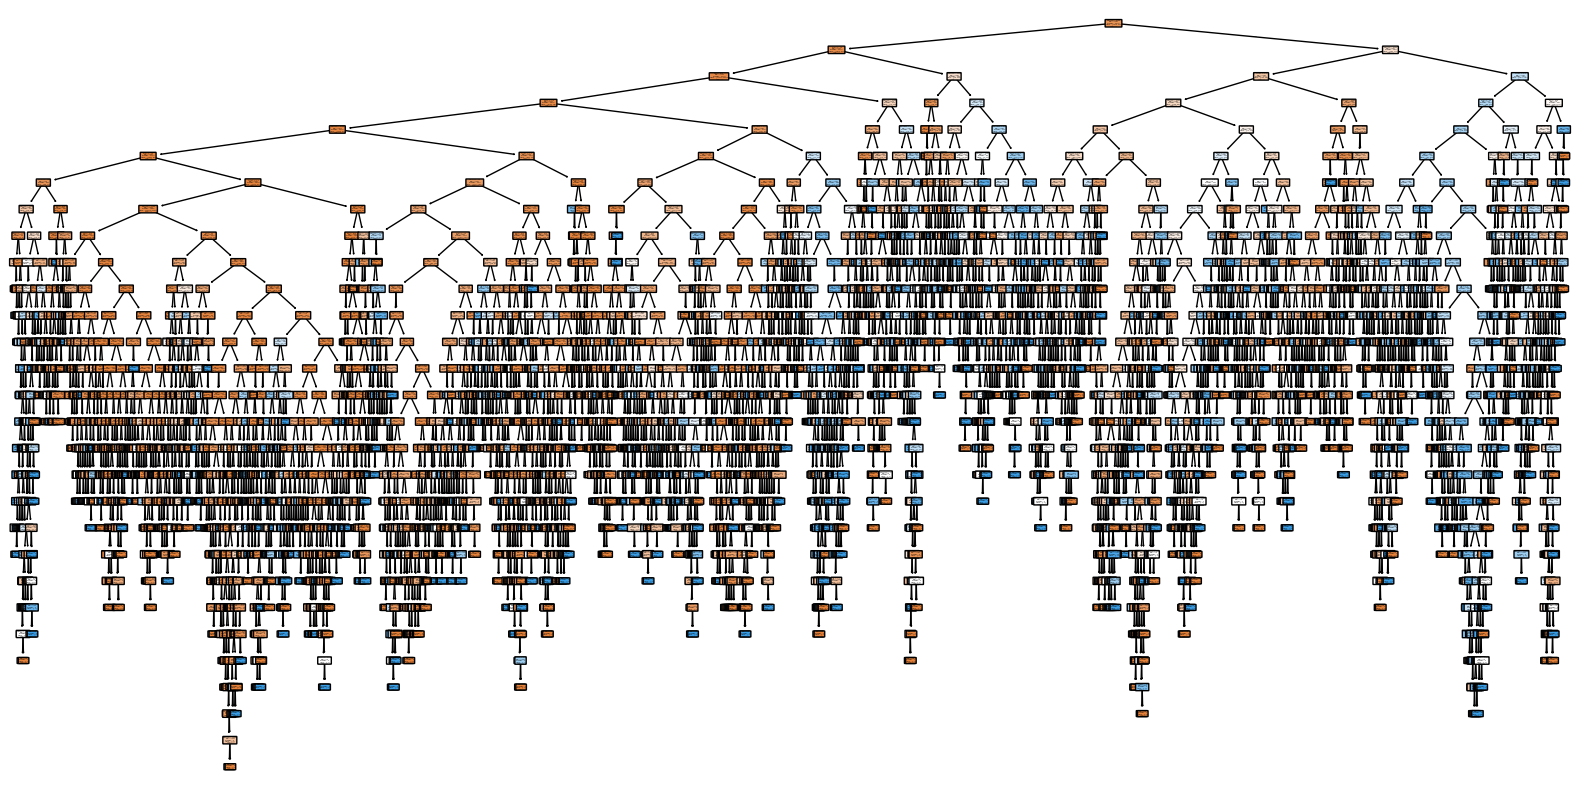

In [9]:
import matplotlib.pyplot as plt
class_names = [str(cls) for cls in y_encoder.classes_]
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.show()